<a href="https://colab.research.google.com/github/Angel353/Concentracion_CADII/blob/main/ValoresAt%C3%ADpicos/ActividadClase/AtipicosIqrDesviacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inicio**

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

In [6]:
df = pd.read_csv("BaseLimpia.csv", index_col = "Unnamed: 0")
df

,fecha,precio,año_hecho,año_renovado,metros_cuadrados,pisos,habitaciones,baños,calle,codigo_zip,estado,ciudad
0,24/06/2019,260070.0,01/01/1982,2016.0,762.0,1.0,4.0,2.0,2400 WALNUT RIDGE ST,75229.0,TX,DALLAS
1,18/07/2019,456280.0,01/01/1982,2016.0,866.0,2.0,4.0,2.0,10400 BIG THICKET DR,75217.0,TX,DALLAS
2,31/07/2019,237820.0,01/01/1982,2016.0,814.0,1.0,5.0,3.0,9200 DARTWOOD LN,75225.0,TX,DALLAS
3,14/08/2019,231000.0,01/01/1980,2016.0,680.0,1.0,4.0,2.0,4800 SIMCOE ST,75228.0,TX,DALLAS
4,31/07/2019,1410820.0,01/01/1980,2016.0,1018.0,2.0,4.0,2.0,6926 STEFANI DR,75225.0,TX,DALLAS
...,...,...,...,...,...,...,...,...,...,...,...,...
4354,04/07/2019,457650.0,01/01/1928,0.0,305.0,1.0,2.0,1.0,1301 HAMEL ST,75212.0,TX,DALLAS
4355,14/06/2019,257360.0,01/01/1928,0.0,299.0,1.0,2.0,1.0,3501 WORD ST,75204.0,TX,DALLAS
4356,16/07/2019,881200.0,01/01/1927,0.0,817.0,2.0,5.0,3.0,1700 RIDGEDORF DR,75217.0,TX,DALLAS
4357,05/08/2019,877080.0,01/01/1927,0.0,576.0,2.0,4.0,2.0,8024 ROTHINGTON RD,75227.0,TX,DALLAS


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4359 entries, 0 to 4358
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha             4359 non-null   object 
 1   precio            4359 non-null   float64
 2   año_hecho         4359 non-null   object 
 3   año_renovado      4359 non-null   float64
 4   metros_cuadrados  4359 non-null   float64
 5   pisos             4359 non-null   float64
 6   habitaciones      4359 non-null   float64
 7   baños             4359 non-null   float64
 8   calle             4359 non-null   object 
 9   codigo_zip        4359 non-null   float64
 10  estado            4359 non-null   object 
 11  ciudad            4359 non-null   object 
dtypes: float64(7), object(5)
memory usage: 571.8+ KB


In [8]:
# No debe haber valores nulos
df.isnull().sum()

,0
fecha,0
precio,0
año_hecho,0
año_renovado,0
metros_cuadrados,0
pisos,0
habitaciones,0
baños,0
calle,0
codigo_zip,0


In [9]:
# Separamos los datos cuantitativos también
cuantitativas = df.select_dtypes(np.number)
cuantitativas

,precio,año_renovado,metros_cuadrados,pisos,habitaciones,baños,codigo_zip
0,260070.0,2016.0,762.0,1.0,4.0,2.0,75229.0
1,456280.0,2016.0,866.0,2.0,4.0,2.0,75217.0
2,237820.0,2016.0,814.0,1.0,5.0,3.0,75225.0
3,231000.0,2016.0,680.0,1.0,4.0,2.0,75228.0
4,1410820.0,2016.0,1018.0,2.0,4.0,2.0,75225.0
...,...,...,...,...,...,...,...
4354,457650.0,0.0,305.0,1.0,2.0,1.0,75212.0
4355,257360.0,0.0,299.0,1.0,2.0,1.0,75204.0
4356,881200.0,0.0,817.0,2.0,5.0,3.0,75217.0
4357,877080.0,0.0,576.0,2.0,4.0,2.0,75227.0


In [10]:
# Elegimos solo los datos cualitativos y los separamos de los datos cuantitativos.
cualitativas = df.select_dtypes(include=['object'])
cualitativas

,fecha,año_hecho,calle,estado,ciudad
0,24/06/2019,01/01/1982,2400 WALNUT RIDGE ST,TX,DALLAS
1,18/07/2019,01/01/1982,10400 BIG THICKET DR,TX,DALLAS
2,31/07/2019,01/01/1982,9200 DARTWOOD LN,TX,DALLAS
3,14/08/2019,01/01/1980,4800 SIMCOE ST,TX,DALLAS
4,31/07/2019,01/01/1980,6926 STEFANI DR,TX,DALLAS
...,...,...,...,...,...
4354,04/07/2019,01/01/1928,1301 HAMEL ST,TX,DALLAS
4355,14/06/2019,01/01/1928,3501 WORD ST,TX,DALLAS
4356,16/07/2019,01/01/1927,1700 RIDGEDORF DR,TX,DALLAS
4357,05/08/2019,01/01/1927,8024 ROTHINGTON RD,TX,DALLAS


In [26]:
cuantiNoPrecio = cuantitativas.drop("precio", axis = 1)
cuantiNoPrecio

,año_renovado,metros_cuadrados,pisos,habitaciones,baños,codigo_zip
0,2016.0,762.0,1.0,4.0,2.0,75229.0
1,2016.0,866.0,2.0,4.0,2.0,75217.0
2,2016.0,814.0,1.0,5.0,3.0,75225.0
3,2016.0,680.0,1.0,4.0,2.0,75228.0
4,2016.0,1018.0,2.0,4.0,2.0,75225.0
...,...,...,...,...,...,...
4354,0.0,305.0,1.0,2.0,1.0,75212.0
4355,0.0,299.0,1.0,2.0,1.0,75204.0
4356,0.0,817.0,2.0,5.0,3.0,75217.0
4357,0.0,576.0,2.0,4.0,2.0,75227.0


<Figure size 1500x800 with 0 Axes>

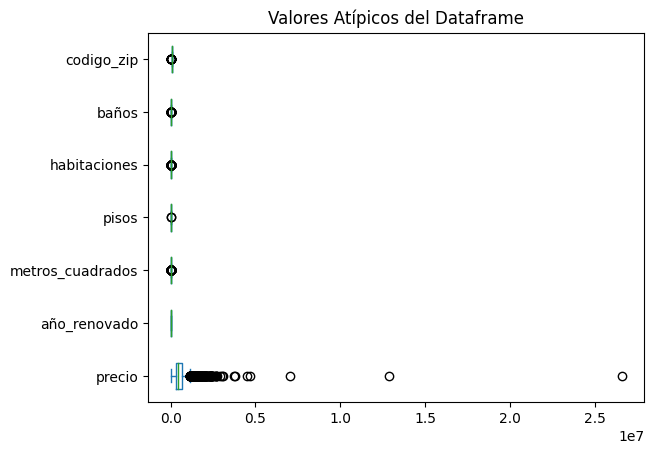

In [21]:
# Realizamos diagrama de caja de cada columna del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
cuantitativas.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Valores Atípicos del Dataframe")
plt.show() #Se muestra el diagrama

<Figure size 1500x800 with 0 Axes>

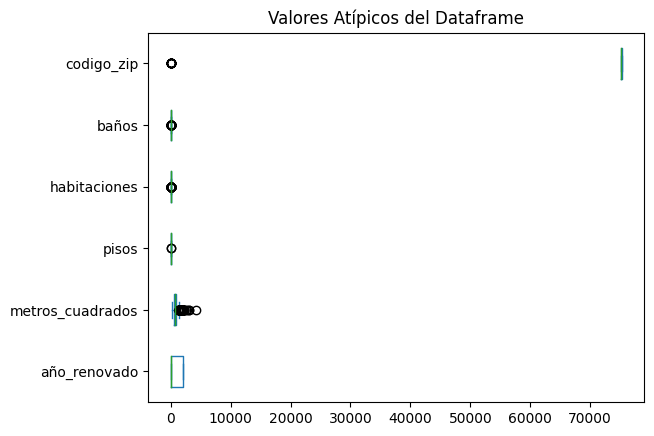

In [27]:
# Realizamos diagrama de caja de cada columna del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
cuantiNoPrecio.plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Valores Atípicos del Dataframe")
plt.show() #Se muestra el diagrama

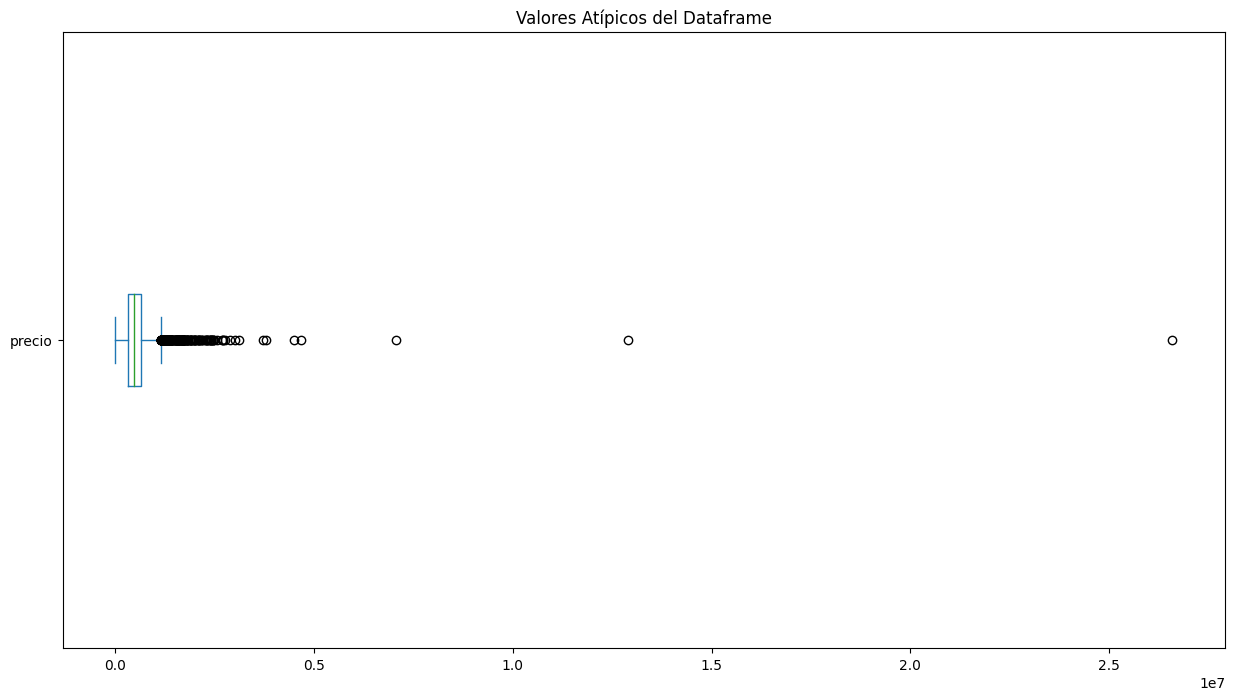

In [22]:
# Realizamos diagrama de caja de cada columna del dataframe
fig = plt.figure(figsize = (15,8)) #Dimensiones
cuantitativas["precio"].plot(kind = 'box', vert = False) # Vert = (Orientación)
plt.title("Valores Atípicos del Dataframe")
plt.show() #Se muestra el diagrama

##**Procedimiento "Desviación Estándar" para eliminar outliers de mi dataframe**

In [33]:
#Método aplicando desviación Estándar, encuentra los valores extremos
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Límite superior permitido:\n\n", Limite_Superior)
print("Límite inferior permitido:\n\n", Limite_Inferior)

Límite superior permitido:

 precio              2.256994e+06
año_renovado        3.736882e+03
metros_cuadrados    1.587158e+03
pisos               3.263311e+00
habitaciones        6.096444e+00
baños               5.004396e+00
codigo_zip          9.012273e+04
dtype: float64
Límite inferior permitido:

 precio             -1.160265e+06
año_renovado       -2.140899e+03
metros_cuadrados   -1.813773e+02
pisos              -1.382828e-01
habitaciones        7.248452e-01
baños              -2.331177e-01
codigo_zip          5.962007e+04
dtype: float64


In [38]:
# Obtenemos los outliers, en este caso, los nulos son los valores correctos
ValuesNull = cuantitativas[(y > Limite_Superior) | (y < Limite_Inferior)]
ValuesNull

,precio,año_renovado,metros_cuadrados,pisos,habitaciones,baños,codigo_zip
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4357,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Obtenemos los datos y los outliers se convierten en nulos en el dataframe
OutliersNull = cuantitativas[(y <= Limite_Superior) & (y >= Limite_Inferior)]
OutliersNull

,precio,año_renovado,metros_cuadrados,pisos,habitaciones,baños,codigo_zip
0,260070.0,2016.0,762.0,1.0,4.0,2.0,75229.0
1,456280.0,2016.0,866.0,2.0,4.0,2.0,75217.0
2,237820.0,2016.0,814.0,1.0,5.0,3.0,75225.0
3,231000.0,2016.0,680.0,1.0,4.0,2.0,75228.0
4,1410820.0,2016.0,1018.0,2.0,4.0,2.0,75225.0
...,...,...,...,...,...,...,...
4354,457650.0,0.0,305.0,1.0,2.0,1.0,75212.0
4355,257360.0,0.0,299.0,1.0,2.0,1.0,75204.0
4356,881200.0,0.0,817.0,2.0,5.0,3.0,75217.0
4357,877080.0,0.0,576.0,2.0,4.0,2.0,75227.0


In [40]:
# Contar los outliers
OutliersNull.isnull().sum()

,0
precio,30
año_renovado,0
metros_cuadrados,45
pisos,2
habitaciones,17
baños,10
codigo_zip,20


In [41]:
# Reemplazar valores atípicos (nulos) del dataframe con "mean"
# Realizamos una copia del dataframe
dfClean = OutliersNull.copy()
dfClean = dfClean.fillna(round(OutliersNull.mean(),1))
dfClean

,precio,año_renovado,metros_cuadrados,pisos,habitaciones,baños,codigo_zip
0,260070.0,2016.0,762.0,1.0,4.0,2.0,75229.0
1,456280.0,2016.0,866.0,2.0,4.0,2.0,75217.0
2,237820.0,2016.0,814.0,1.0,5.0,3.0,75225.0
3,231000.0,2016.0,680.0,1.0,4.0,2.0,75228.0
4,1410820.0,2016.0,1018.0,2.0,4.0,2.0,75225.0
...,...,...,...,...,...,...,...
4354,457650.0,0.0,305.0,1.0,2.0,1.0,75212.0
4355,257360.0,0.0,299.0,1.0,2.0,1.0,75204.0
4356,881200.0,0.0,817.0,2.0,5.0,3.0,75217.0
4357,877080.0,0.0,576.0,2.0,4.0,2.0,75227.0


In [43]:
# Corroboramos los valores nulos en el data clean
dfClean.isnull().sum()

,0
precio,0
año_renovado,0
metros_cuadrados,0
pisos,0
habitaciones,0
baños,0
codigo_zip,0


In [44]:
# Unimos las columnas cualitativas y las cuantitativas procesadas de outliers
Datos_sin_outliers = pd.concat([cualitativas, dfClean], axis=1)
Datos_sin_outliers

,fecha,año_hecho,calle,estado,ciudad,precio,año_renovado,metros_cuadrados,pisos,habitaciones,baños,codigo_zip
0,24/06/2019,01/01/1982,2400 WALNUT RIDGE ST,TX,DALLAS,260070.0,2016.0,762.0,1.0,4.0,2.0,75229.0
1,18/07/2019,01/01/1982,10400 BIG THICKET DR,TX,DALLAS,456280.0,2016.0,866.0,2.0,4.0,2.0,75217.0
2,31/07/2019,01/01/1982,9200 DARTWOOD LN,TX,DALLAS,237820.0,2016.0,814.0,1.0,5.0,3.0,75225.0
3,14/08/2019,01/01/1980,4800 SIMCOE ST,TX,DALLAS,231000.0,2016.0,680.0,1.0,4.0,2.0,75228.0
4,31/07/2019,01/01/1980,6926 STEFANI DR,TX,DALLAS,1410820.0,2016.0,1018.0,2.0,4.0,2.0,75225.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4354,04/07/2019,01/01/1928,1301 HAMEL ST,TX,DALLAS,457650.0,0.0,305.0,1.0,2.0,1.0,75212.0
4355,14/06/2019,01/01/1928,3501 WORD ST,TX,DALLAS,257360.0,0.0,299.0,1.0,2.0,1.0,75204.0
4356,16/07/2019,01/01/1927,1700 RIDGEDORF DR,TX,DALLAS,881200.0,0.0,817.0,2.0,5.0,3.0,75217.0
4357,05/08/2019,01/01/1927,8024 ROTHINGTON RD,TX,DALLAS,877080.0,0.0,576.0,2.0,4.0,2.0,75227.0


# **Procedimiento "cuantiles" para sustituir outliers en dataframe**

In [46]:
# Método aplicando cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuantitativas
percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

LimiteSuperiorIqr = percentile75 + 1.5*iqr
LimiteInferiorIqr = percentile25 + 1.5*iqr

print("Límite superior permitido:\n\n", LimiteSuperiorIqr)
print("Límite inferior permitido:\n\n", LimiteInferiorIqr)

Límite superior permitido:

 precio              1136575.0
año_renovado           5002.5
metros_cuadrados       1376.5
pisos                     3.5
habitaciones              5.5
baños                     4.5
codigo_zip            75243.5
dtype: float64
Límite inferior permitido:

 precio              810965.0
año_renovado          3001.5
metros_cuadrados      1023.5
pisos                    2.5
habitaciones             4.5
baños                    3.5
codigo_zip           75230.5
dtype: float64


In [47]:
# Obtener los valores limpios del dataframe
# Obtenemos los datos y los outliers se convierten en nulos en el dataframe
OutliersNullIqr = cuantitativas[(y <= Limite_Superior) & (y >= Limite_Inferior)]
OutliersNullIqr

,precio,año_renovado,metros_cuadrados,pisos,habitaciones,baños,codigo_zip
0,260070.0,2016.0,762.0,1.0,4.0,2.0,75229.0
1,456280.0,2016.0,866.0,2.0,4.0,2.0,75217.0
2,237820.0,2016.0,814.0,1.0,5.0,3.0,75225.0
3,231000.0,2016.0,680.0,1.0,4.0,2.0,75228.0
4,1410820.0,2016.0,1018.0,2.0,4.0,2.0,75225.0
...,...,...,...,...,...,...,...
4354,457650.0,0.0,305.0,1.0,2.0,1.0,75212.0
4355,257360.0,0.0,299.0,1.0,2.0,1.0,75204.0
4356,881200.0,0.0,817.0,2.0,5.0,3.0,75217.0
4357,877080.0,0.0,576.0,2.0,4.0,2.0,75227.0


In [49]:
# Contar los outliers
OutliersNullIqr.isnull().sum()

,0
precio,30
año_renovado,0
metros_cuadrados,45
pisos,2
habitaciones,17
baños,10
codigo_zip,20


In [50]:
# Reemplazar valores atípicos (nulos) del dataframe con "mean"
# Realizamos una copia del dataframe
dfCleanIqr = OutliersNullIqr.copy()
dfCleanIqr = dfClean.fillna(round(OutliersNullIqr.mean(),1))
dfCleanIqr

,precio,año_renovado,metros_cuadrados,pisos,habitaciones,baños,codigo_zip
0,260070.0,2016.0,762.0,1.0,4.0,2.0,75229.0
1,456280.0,2016.0,866.0,2.0,4.0,2.0,75217.0
2,237820.0,2016.0,814.0,1.0,5.0,3.0,75225.0
3,231000.0,2016.0,680.0,1.0,4.0,2.0,75228.0
4,1410820.0,2016.0,1018.0,2.0,4.0,2.0,75225.0
...,...,...,...,...,...,...,...
4354,457650.0,0.0,305.0,1.0,2.0,1.0,75212.0
4355,257360.0,0.0,299.0,1.0,2.0,1.0,75204.0
4356,881200.0,0.0,817.0,2.0,5.0,3.0,75217.0
4357,877080.0,0.0,576.0,2.0,4.0,2.0,75227.0


In [51]:
dfCleanIqr.isnull().sum()

,0
precio,0
año_renovado,0
metros_cuadrados,0
pisos,0
habitaciones,0
baños,0
codigo_zip,0


In [52]:
# Unimos las columnas cualitativas y las cuantitativas procesadas de outliers
dfLimpioIqr = pd.concat([cualitativas, dfCleanIqr], axis=1)
dfLimpioIqr

,fecha,año_hecho,calle,estado,ciudad,precio,año_renovado,metros_cuadrados,pisos,habitaciones,baños,codigo_zip
0,24/06/2019,01/01/1982,2400 WALNUT RIDGE ST,TX,DALLAS,260070.0,2016.0,762.0,1.0,4.0,2.0,75229.0
1,18/07/2019,01/01/1982,10400 BIG THICKET DR,TX,DALLAS,456280.0,2016.0,866.0,2.0,4.0,2.0,75217.0
2,31/07/2019,01/01/1982,9200 DARTWOOD LN,TX,DALLAS,237820.0,2016.0,814.0,1.0,5.0,3.0,75225.0
3,14/08/2019,01/01/1980,4800 SIMCOE ST,TX,DALLAS,231000.0,2016.0,680.0,1.0,4.0,2.0,75228.0
4,31/07/2019,01/01/1980,6926 STEFANI DR,TX,DALLAS,1410820.0,2016.0,1018.0,2.0,4.0,2.0,75225.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4354,04/07/2019,01/01/1928,1301 HAMEL ST,TX,DALLAS,457650.0,0.0,305.0,1.0,2.0,1.0,75212.0
4355,14/06/2019,01/01/1928,3501 WORD ST,TX,DALLAS,257360.0,0.0,299.0,1.0,2.0,1.0,75204.0
4356,16/07/2019,01/01/1927,1700 RIDGEDORF DR,TX,DALLAS,881200.0,0.0,817.0,2.0,5.0,3.0,75217.0
4357,05/08/2019,01/01/1927,8024 ROTHINGTON RD,TX,DALLAS,877080.0,0.0,576.0,2.0,4.0,2.0,75227.0


In [53]:
# Convertir Dataframe a CSV
dfLimpioIqr.to_csv("dfSinOutliers.csv")

In [54]:
# Descargar archivo filtrado en csv
from google.colab import files

files.download("dfSinOutliers.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>